In [7]:
import numpy as np
import pandas as pd
import math
import datetime
import os
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.api as sm
from scipy.stats import t
from sklearn.utils import check_array
from functools import reduce
import seaborn as sns
import warnings
import collections
from matplotlib.pylab import rcParams
warnings.simplefilter(action='ignore', category=Warning)
import seaborn as sns
sns.set()
import pickle
import altair as alt
from vega_datasets import data
import statsmodels.stats.multicomp as mc
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
# alt.renderers.enable("browser")
alt.renderers.enable('default')
alt.data_transformers.enable('vegafusion')
import folium
from Utils.UtilsGeoViz import *
US_coord = [37.0902, -102]
NY_COORD = [40.7128, -74.0060]

In [5]:
nyc = pd.read_csv('data/listings.csv.gz')
nyc = nyc[nyc['price'].notna()]
nyc['price'] = nyc['price'].str.replace('$', '').str.replace(',', '').astype(float)
# Filter the prices below 500
nyc = nyc[nyc['price'] <= 500]


In [40]:
# Calculate the average price per neighborhood group
avg_price_per_neighborhood = nyc.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()

# Create the Altair bar chart
bar_chart = alt.Chart(avg_price_per_neighborhood).mark_bar().encode(
    x=alt.X('price:Q', title='Average Price', axis=alt.Axis(format='$.2f')),
    y=alt.Y('neighbourhood_group_cleansed:N', title='Borough'),
    color=alt.Color('neighbourhood_group_cleansed:N', title='Borough')
).properties(
    title=alt.TitleParams(
        text='Average Price by Neighborhood Group',
        anchor='start',  # Align title to the right
        fontSize=20    # Change title font size
    ),
    width=600,
    height=600
).configure_axis(
    labelFontSize=16,
    titleFontSize=16
).configure_legend(
    labelFontSize=12,
    titleFontSize=12
)

# Display the chart
bar_chart.save('avg_price_per_neighborhood.png')
bar_chart

alt.Chart(...)

In [41]:
# Calculate the count of listings per neighborhood group
count_per_neighborhood = nyc['neighbourhood_group_cleansed'].value_counts().reset_index()
count_per_neighborhood.columns = ['neighbourhood_group_cleansed', 'count']

# Create the Altair bar chart
count_chart = alt.Chart(count_per_neighborhood).mark_bar().encode(
    x=alt.X('count:Q', title='Count of Listings'),
    y=alt.Y('neighbourhood_group_cleansed:N', title='Borough'),
    color=alt.Color('neighbourhood_group_cleansed:N', title='Borough')
).properties(
    title=alt.TitleParams(
        text='Count of Listings by Neighborhood Group',
        anchor='start',  # Align title to the right
        fontSize=20    # Change title font size
    ),
    width=600,
    height=600
).configure_axis(
    labelFontSize=16,
    titleFontSize=16
).configure_legend(
    labelFontSize=12,
    titleFontSize=12
)

# Display the chart
count_chart.save('count_per_neighborhood.png')
count_chart


alt.Chart(...)

In [42]:
# Create the Altair grouped boxplot
boxplot_chart = alt.Chart(nyc).mark_boxplot(size=75).encode(
    x=alt.X('price:Q', title='Price', axis=alt.Axis(format='$.2f'), scale=alt.Scale(domain=[0, 600])),
    y=alt.Y('neighbourhood_group_cleansed:N', title='Borough'),
    color=alt.Color('neighbourhood_group_cleansed:N', title='Borough')
).properties(
    title=alt.TitleParams(
        text='Boxplot of Prices by Borough',
        anchor='start',  # Align title to the right
        fontSize=20    # Change title font size
    ),
    width=600,
    height=600
).configure_axis(
    labelFontSize=16,
    titleFontSize=16
).configure_legend(
    labelFontSize=12,
    titleFontSize=12
)

# Display the chart
boxplot_chart.save('boxplot_prices_per_neighborhood.png')
boxplot_chart


alt.Chart(...)

In [43]:
# Load the amenities.csv file
amenities = pd.read_csv('data/amenities.csv')
# amenities['amenities'] = amenities['amenities'].str.replace('""', '')
amenities_count = amenities['amenities'].value_counts().head(20).reset_index()
amenities_count.columns = ['amenities', 'count']

# Create the Altair bar chart to count each value in the "amenities" column

In [60]:

# Create the Altair bar chart to count each value in the "amenities" column
bar_chart = alt.Chart(amenities_count).mark_bar().encode(
    x=alt.X('count:Q', title='Count'),
    y=alt.Y('amenities:N', title='Amenities').sort('-x'),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Top 20 Amenities Count',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=450,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

# Display the chart
bar_chart.save('top_20_amenities_count.png')
bar_chart


alt.Chart(...)

0    0.726752
1    0.879438
2    0.470819
3    0.493540
4    0.980075
5    0.273248
6    0.120562
7    0.529181
8    0.506460
9    0.019925
Name: percentage, dtype: float64

In [58]:
# Load the listing_essential_amenities.csv file
essentials = pd.read_csv('data/listing_essential_amenities.csv')

# Calculate the percentage of 'listed' for each 'amenities' value
essentials_percentage = essentials.groupby('amenities')['listed'].value_counts(normalize=True).unstack().fillna(0) * 100
essentials_percentage = essentials_percentage.reset_index()

# Melt the dataframe to have a long format suitable for Altair
essentials_melted = essentials_percentage.melt(id_vars='amenities', value_vars=[True, False], var_name='listed', value_name='percentage')

essentials_melted['percentage'] = essentials_melted['percentage'] / 100
# Create the Altair stacked bar chart
stacked_bar_chart = alt.Chart(essentials_melted).mark_bar().encode(
    x=alt.X('sum(percentage):Q', axis=alt.Axis(format='%'), title='Percentage'),
    y=alt.Y('amenities:N', title='Amenities', sort='-x'),
    color=alt.Color('listed:N', title='Listed', scale=alt.Scale(domain=[True, False], range=['#A32638', '#D3D3D3'])),
    order=alt.Order('listed', sort='descending')
).properties(
    title=alt.TitleParams(
        text='Percentage of Listings with Essential Amenities',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=500,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
).configure_legend(
    labelFontSize=14,  # Increase the size of the text in the legend
    titleFontSize=16   # Optionally increase the title font size in the legend
)

# Display the chart
stacked_bar_chart.save('percentage_listed_essential_amenities.png')
stacked_bar_chart


alt.Chart(...)

In [124]:
accept = nyc[["host_id","host_acceptance_rate","price", "host_is_superhost"]]
# Filter the accept dataframe into two dataframes based on 'host_is_superhost'
superhost_df = accept[accept['host_is_superhost'] == 't']
not_superhost_df = accept[accept['host_is_superhost'] == 'f']


In [125]:
accept['host_is_superhost'].value_counts()


host_is_superhost
f    15198
t     5794
Name: count, dtype: int64

In [142]:
# create a histogram for not_superhost_df
histogram_not_superhost = alt.Chart(not_superhost_df).mark_bar().encode(
    x=alt.X('price:Q', bin=alt.Bin(maxbins=100), title='Price', axis=alt.Axis(values=list(range(0, 501, 100)), format='$')),
    y=alt.Y('count()', title='Count'),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Not Superhost',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

histogram_not_superhost.save('histogram_not_superhost_price.png')
histogram_not_superhost


alt.Chart(...)

In [143]:
# create a histogram for superhost_df
histogram_superhost = alt.Chart(superhost_df).mark_bar().encode(
    x=alt.X('price:Q', bin=alt.Bin(maxbins=100), title='Price', axis=alt.Axis(values=list(range(0, 501, 100)), format='$')),
    y=alt.Y('count()', title='Count'),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Superhost',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

histogram_superhost.save('histogram_superhost_price.png')
histogram_superhost


alt.Chart(...)

In [3]:
import pandas as pd

# Load the CSV file
room_type_df = pd.read_csv('data/room_type_price.csv')

# Filter out prices greater than or equal to 500
room_type_df = room_type_df[room_type_df['price'] <= 500]

room_type_df.head()

,id,price,room_type
0,7.393339e+17,89.0,Private room
1,5.726121e+17,45.0,Private room
2,4.526794e+07,107.0,Private room
3,8.381412e+17,140.0,Entire home/apt
4,1.082661e+18,340.0,Entire home/apt


In [7]:
# Create a bar chart that shows the count based on the column room_type
room_type_count_chart = alt.Chart(room_type_df).mark_bar().encode(
    x=alt.X('room_type:N', title='Room Type', axis=alt.Axis(labelAngle=45)),
    y=alt.Y('count()', title='Count'),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Count of Listings by Room Type',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

room_type_count_chart.save('room_type_count_chart.png')
room_type_count_chart


alt.Chart(...)

In [10]:
# Create a grouped box plot that shows 'price' on the y-axis and 'room_type' on the x-axis
grouped_box_plot = alt.Chart(room_type_df).mark_boxplot(size=100).encode(
    x=alt.X('room_type:N', title='Room Type', axis=alt.Axis(labelAngle=45)),
    y=alt.Y('price:Q', title='Price', scale=alt.Scale(domain=[0, 600])),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Price Distribution by Room Type',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

grouped_box_plot.save('grouped_box_plot.png')
grouped_box_plot


alt.Chart(...)

In [31]:
# Import the 'bedroom_price.csv' file and filter bedrooms for values less than 5
bedroom_price_df = pd.read_csv('data/bedroom_price.csv')
bedroom_price_df = bedroom_price_df[bedroom_price_df['bedrooms'] < 8]
bedroom_price_df = bedroom_price_df[bedroom_price_df['price'] < 500]

bedroom_price_df.head()


,id,price,bedrooms
0,7.393339e+17,89.0,1
1,5.726121e+17,45.0,1
2,4.526794e+07,107.0,1
3,8.381412e+17,140.0,3
4,1.082661e+18,340.0,4


In [35]:
# Create a bar chart that shows the count of bedrooms on the y-axis
bedroom_count_chart = alt.Chart(bedroom_price_df).mark_bar().encode(
    x=alt.X('bedrooms:O', title='Number of Bedrooms', axis=alt.Axis(labelAngle=360)),
    y=alt.Y('count():Q', title='Count'),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Bedrooms',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

bedroom_count_chart.save('bedroom_count_chart.png')
bedroom_count_chart


alt.Chart(...)

In [101]:
# Create a box plot using the altair package where 'prices' are on the y-axis and 'bedrooms' is on the x-axis
bedroom_price_box_plot = alt.Chart(bedroom_price_df).mark_boxplot(size=50).encode(
    x=alt.X('bedrooms:O', title='Number of Bedrooms', axis=alt.Axis(labelAngle=360)),
    y=alt.Y('price:Q', title='Price', scale=alt.Scale(domain=[0, 550])),
    color=alt.Color('bedrooms:O', scale=alt.Scale(scheme='reds'))
).properties(
    title=alt.TitleParams(
        text='Number of Bedrooms vs Price',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

bedroom_price_box_plot.save('bedroom_price_box_plot.png')
bedroom_price_box_plot


alt.Chart(...)

In [179]:
apartment_list = ["apartment", "House", "Townhouse", "Loft", "condo", "Serviced apartment"]

def populate_property_agg(v):
    if 'home' in v.lower() or 'guesthouse' in v.lower():
        return 'Home'
    if 'hotel' in v.lower():
        return 'Hotel'
    if 'townhouse' in v.lower():
        return 'Townhouse'
    if 'serviced apartment' in v.lower():
        return 'Serviced Apartment'
    if 'apartment' in v.lower() or 'unit' in v.lower():
        return 'Apartment'
    if 'loft' in v.lower():
        return 'Loft'
    if 'condo' in v.lower():
        return 'Condo'
    if v not in apartment_list:
        return 'Other'
    return v

nyc['property_agg'] = nyc["property_type"].apply(populate_property_agg)
nyc['property_agg'].value_counts()

property_agg
Apartment             14603
Home                   2916
Condo                   945
Townhouse               876
Hotel                   790
Other                   693
Loft                    314
Serviced Apartment      238
Name: count, dtype: int64

In [174]:
nyc['property_type'].unique()

array(['Entire rental unit', 'Private room in condo',
       'Private room in rental unit', 'Private room in guest suite',
       'Entire place', 'Entire loft', 'Private room in townhouse',
       'Entire condo', 'Private room in loft', 'Entire townhouse',
       'Entire home', 'Private room in home',
       'Private room in bed and breakfast', 'Entire guesthouse',
       'Room in boutique hotel', 'Entire serviced apartment',
       'Entire guest suite', 'Private room in houseboat',
       'Shared room in home', 'Private room',
       'Shared room in rental unit', 'Private room in guesthouse', 'Boat',
       'Room in serviced apartment', 'Private room in religious building',
       'Casa particular', 'Private room in villa',
       'Private room in serviced apartment', 'Private room in tiny home',
       'Entire bungalow', 'Shared room in condo',
       'Shared room in townhouse', 'Room in hotel', 'Entire cottage',
       'Tiny home', 'Shared room in loft', 'Entire villa',
       'Priv

In [181]:
property_type = nyc[['property_agg', 'price']]

import altair as alt

property_price_box_plot = alt.Chart(property_type).mark_boxplot(size=30).encode(
    x=alt.X('price:Q', title='Price', scale=alt.Scale(domain=[0, 550])),
    y=alt.Y('property_agg:N', title='Property Type'),
    color=alt.Color('property_agg:N', scale=alt.Scale(scheme='reds'), legend=alt.Legend(title='Property Type'))
).properties(
    title=alt.TitleParams(
        text='Price Distribution by Property Type',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

property_price_box_plot.save('property_price_box_plot.png')
property_price_box_plot


alt.Chart(...)

In [182]:
apartment = nyc[nyc['property_agg'] == 'Apartment'][['accommodates', 'property_agg']]


In [183]:
accommodates_count = apartment['accommodates'].value_counts(normalize=True).reset_index()
accommodates_count.columns = ['accommodates', 'percentage']


accommodates_bar_chart = alt.Chart(accommodates_count).mark_bar().encode(
    x=alt.X('accommodates:O', title='Accommodates', axis=alt.Axis(labelAngle=360)),
    y=alt.Y('percentage:Q', title='Percentage', axis=alt.Axis(format='%')),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Apartment Accommodations',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

accommodates_bar_chart.save('accommodates_bar_chart.png')
accommodates_bar_chart


alt.Chart(...)

In [184]:
house = nyc[nyc['property_agg'] == 'Home'][['accommodates', 'property_agg']]


accommodates_count_house = house['accommodates'].value_counts(normalize=True).reset_index()
accommodates_count_house.columns = ['accommodates', 'percentage']

accommodates_bar_chart_house = alt.Chart(accommodates_count_house).mark_bar().encode(
    x=alt.X('accommodates:O', title='Accommodates', axis=alt.Axis(labelAngle=360)),
    y=alt.Y('percentage:Q', title='Percentage', axis=alt.Axis(format='%')),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='House Accommodations',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

accommodates_bar_chart_house.save('accommodates_bar_chart_house.png')
accommodates_bar_chart_house


alt.Chart(...)

In [185]:
condo = nyc[nyc['property_agg'] == 'Condo'][['accommodates', 'property_agg']]

In [186]:
accommodates_count_condo = condo['accommodates'].value_counts(normalize=True).reset_index()
accommodates_count_condo.columns = ['accommodates', 'percentage']

accommodates_bar_chart_condo = alt.Chart(accommodates_count_condo).mark_bar().encode(
    x=alt.X('accommodates:O', title='Accommodates', axis=alt.Axis(labelAngle=360)),
    y=alt.Y('percentage:Q', title='Percentage', axis=alt.Axis(format='%')),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Condo Accommodations',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

accommodates_bar_chart_condo.save('accommodates_bar_chart_condo.png')
accommodates_bar_chart_condo


alt.Chart(...)

In [187]:
townhouse = nyc[nyc['property_agg'] == 'Townhouse'][['accommodates', 'property_agg']]

In [188]:
accommodates_count_townhouse = townhouse['accommodates'].value_counts(normalize=True).reset_index()
accommodates_count_townhouse.columns = ['accommodates', 'percentage']

accommodates_bar_chart_townhouse = alt.Chart(accommodates_count_townhouse).mark_bar().encode(
    x=alt.X('accommodates:O', title='Accommodates', axis=alt.Axis(labelAngle=360)),
    y=alt.Y('percentage:Q', title='Percentage', axis=alt.Axis(format='%')),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Townhouse Accommodations',
        anchor='start',  # Align title to the left
        fontSize=20      # Change title font size
    ),
    width=550,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=20
)

accommodates_bar_chart_townhouse.save('accommodates_bar_chart_townhouse.png')
accommodates_bar_chart_townhouse


alt.Chart(...)

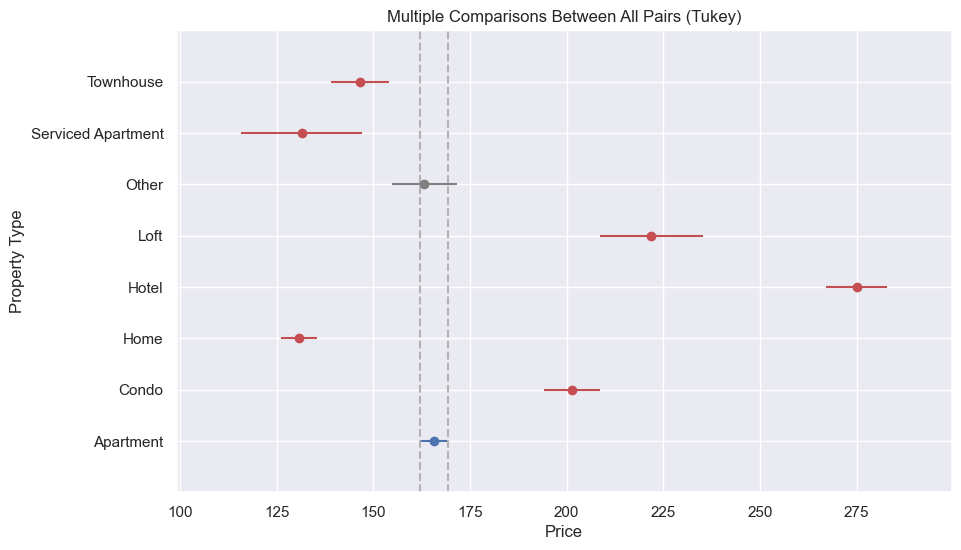

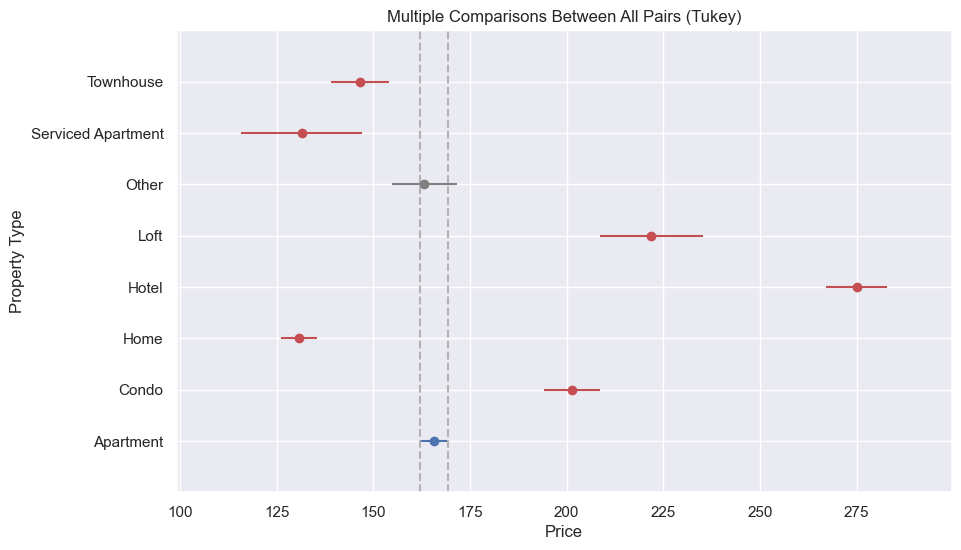

In [189]:
m_comp = mc.MultiComparison(nyc['price'], nyc['property_agg']) 

tukey_res = m_comp.tukeyhsd() 

tukey_res.plot_simultaneous(
    xlabel='Price',
    ylabel='Property Type',
    comparison_name='Apartment',
)

In [239]:
interaction = nyc[['property_agg', 'room_type', 'price']]
interaction.head()

,property_agg,room_type,price
0,Apartment,Entire home/apt,240.0
1,Apartment,Entire home/apt,83.0
2,Condo,Private room,65.0
3,Apartment,Private room,71.0
5,Other,Private room,205.0


In [233]:
groups = interaction.groupby(['property_agg', 'room_type']).agg({'price': 'count'}).reset_index()

In [240]:
interaction.groupby(['room_type']).agg({'price': 'mean'}).reset_index().sort_values(by='price', ascending=False)

,room_type,price
1,Hotel room,244.654472
0,Entire home/apt,212.810480
2,Private room,108.731343
3,Shared room,87.514523


In [238]:
interaction.groupby(['property_agg']).agg({'price': 'mean'}).reset_index().sort_values(by='price', ascending=False)


,property_agg,price
3,Hotel,274.931646
4,Loft,221.875796
1,Condo,201.291005
0,Apartment,165.663973
5,Other,163.206349
7,Townhouse,146.615297
6,Serviced Apartment,131.504202
2,Home,130.688615


In [204]:
model = ols('price ~ property_agg + room_type + property_agg:room_type', data=interaction).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
property_agg,1.915003e+07,7.0,347.013542,4.916104e-149
room_type,5.570908e+07,3.0,2355.481425,0.000000e+00
property_agg:room_type,8.168251e+06,21.0,49.338360,2.244956e-145
Residual,1.683150e+08,21350.0,NaN,NaN


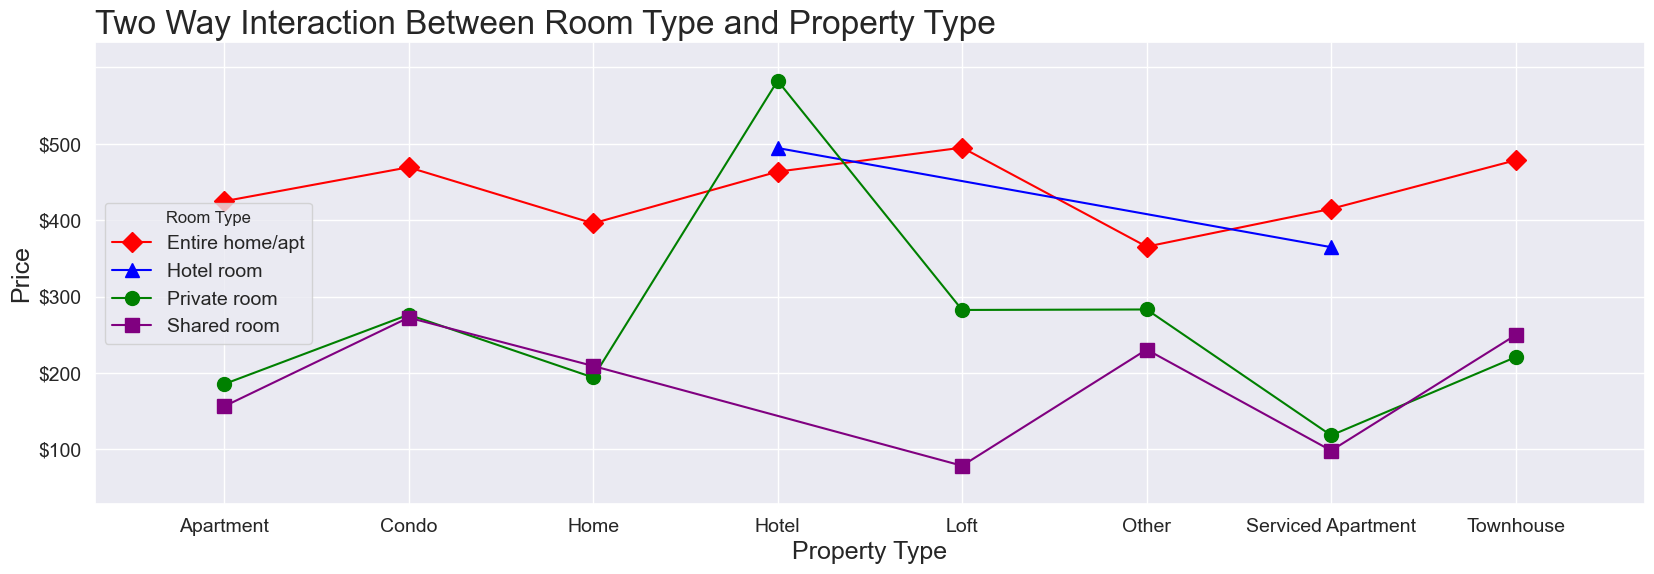

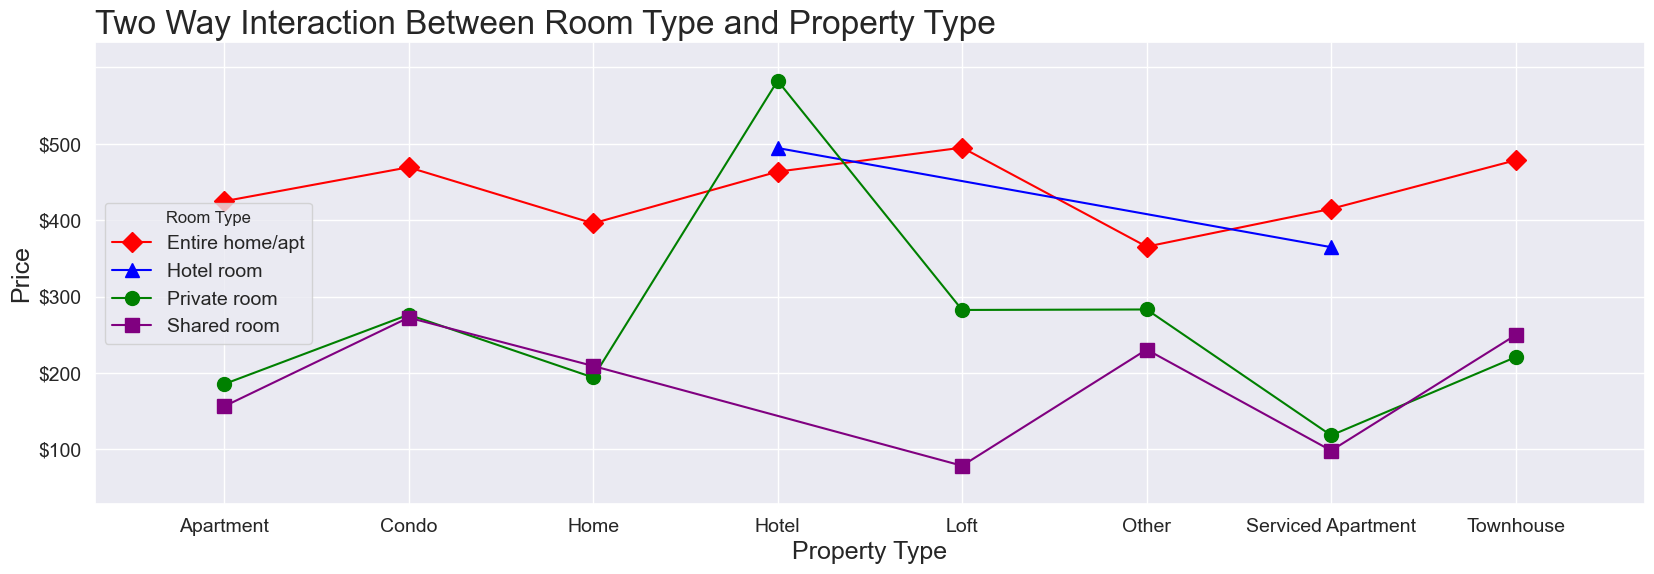

In [205]:
fig, ax = plt.subplots(figsize=(20, 6))
fig = interaction_plot(
    x=interaction['property_agg'],
    trace=interaction['room_type'],
    response=interaction['price'],
    colors=["red", "blue", "green", "purple"],
    markers=["D", "^", "o", "s"],  # Added more markers and colors to match the number of trace levels
    ms=10,
    ax=ax,
)
ax.set_title('Two Way Interaction Between Room Type and Property Type', fontsize=24, loc='left')
ax.set_xlabel('Property Type', fontsize=18)
ax.set_ylabel('Price', fontsize=18)
ax.set_xticklabels(['Apartment', 'Condo', 'Home', 'Hotel', 'Loft', 'Other', 'Serviced Apartment', 'Townhouse'], fontsize=14)
ax.set_yticklabels(['$0', '$100', '$200', '$300', '$400', '$500'], fontsize=14)
ax.legend(title='Room Type', fontsize=14)
fig.savefig('interaction_plot.png')
fig


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

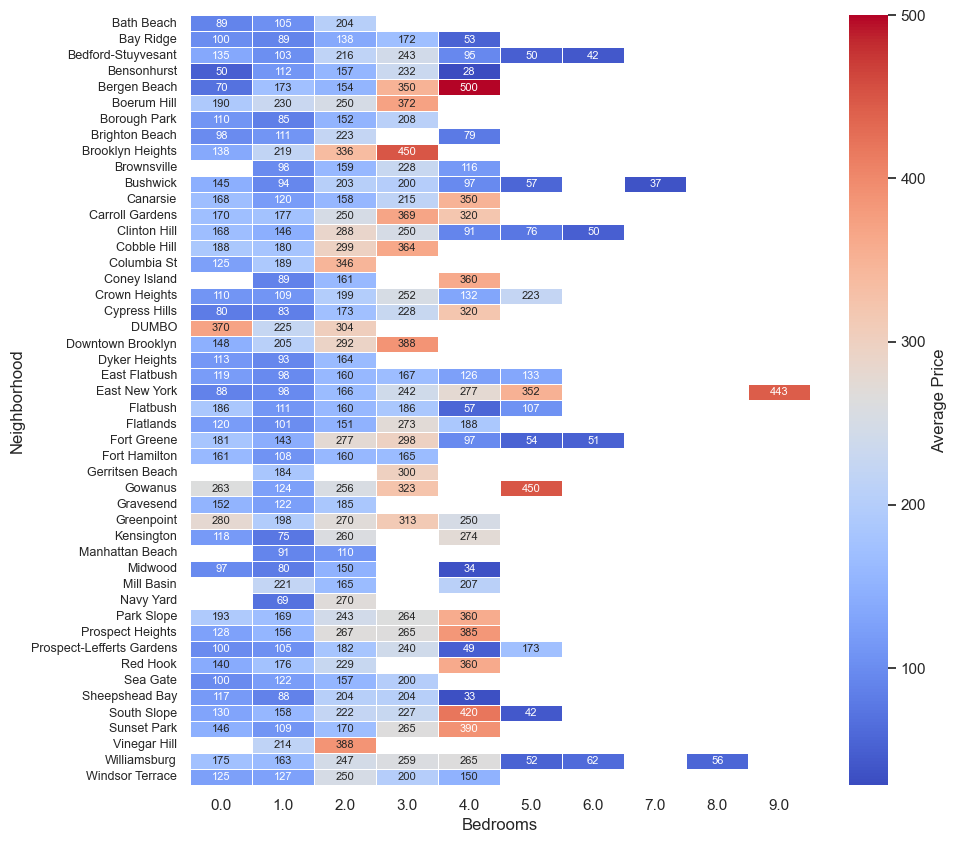

<Figure size 640x480 with 0 Axes>

In [230]:
brooklyn = nyc[nyc['neighbourhood_group_cleansed'] == 'Brooklyn']
neighborhood_bedrooms = brooklyn[['neighbourhood_cleansed', 'bedrooms', 'price']]
plt.figure(figsize=(10, 10))
sns.heatmap(neighborhood_bedrooms.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f", annot_kws={"size": 8}, cbar_kws={'label': 'Average Price'}, cmap='coolwarm', linewidths=.5)
plt.gca().set_facecolor('white')
plt.ylabel('Neighborhood', fontsize=12)  # Changed y-axis title to 'Neighborhood' and set font size
plt.xlabel('Bedrooms')  # Changed x-axis title to 'Bedrooms'
plt.yticks(fontsize=9)  # Changed font size of y-tick markers
plt.show()
plt.savefig('brooklyn_bedrooms_price.png',bbox_inches='tight')


,neighbourhood_cleansed,bedrooms,price
1,Williamsburg,2.0,83.0
5,Fort Greene,1.0,205.0
6,Williamsburg,0.0,290.0
7,Bedford-Stuyvesant,1.0,170.0
9,Bedford-Stuyvesant,1.0,90.0
...,...,...,...
37538,Cypress Hills,3.0,180.0
37539,Williamsburg,1.0,50.0
37543,Bensonhurst,4.0,28.0
37544,Bedford-Stuyvesant,3.0,475.0


In [8]:
import pandas as pd
import altair as alt

# Import the var_imp.csv
var_imp = pd.read_csv('data/var_imp.csv')

# Create a bar chart with the var_imp column on the y-axis using Altair
chart = alt.Chart(var_imp).mark_bar().encode(
    y=alt.Y('variable', sort='-x', title='Variable'),
    x=alt.X('importance', title='Importance'),
    color=alt.value('#A32638')
).properties(
    title=alt.TitleParams(
        text='Variable Importance',
        fontSize=24,
        anchor='start'
    ),
    width=600,
    height=400
).configure_axis(
    labelAngle=45,
    labelFontSize=14,  # Increase font size of the yticks
    titleFontSize=14   # Increase font size of the x-axis title
)

chart.save('variable_importance.png')
chart


alt.Chart(...)

In [14]:
nbhood_listings_data = nyc[["id", "neighbourhood_cleansed"]].groupby(by="neighbourhood_cleansed", as_index=False).count()
neighbourhoods_geojson_path = "neighbourhoods.geojson"

# Check the bins parameter
max_listings = nbhood_listings_data["id"].max()
th_scale = list(range(0, max_listings + 100, 100))

m1 = folium.Map(location=NY_COORD, tiles='OpenStreetMap', zoom_start=11)
# Add a choropleth map
m1 = add_choroplethmap(m1=m1, data=nbhood_listings_data,
                       json_path=neighbourhoods_geojson_path, 
                       json_key='feature.properties.neighbourhood', 
                       threshold_scale=th_scale,
                       name="Neighbourhoods with listings")


open_map_in_browser(m1, "geo_listings.html")
m1

In [11]:
nbhood_listings_data

,neighbourhood_cleansed,id
0,Allerton,39
1,Arden Heights,4
2,Arrochar,10
3,Arverne,63
4,Astoria,262
...,...,...
216,Windsor Terrace,47
217,Woodhaven,74
218,Woodlawn,8
219,Woodrow,2
